In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:23<00:00, 51.7MB/s]
100% 2.29G/2.29G [00:23<00:00, 106MB/s] 


In [ ]:
#Unzipping
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import ZeroPadding2D,Conv2D,BatchNormalization,ReLU,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/train',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/val',
    labels = 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/chest_xray/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)
test_dataset = test_dataset.map(process)

# Building the Model

In [ ]:
model = Sequential()

model.add(ZeroPadding2D(padding=(3,3),input_shape=(256,256,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',strides=(1,1)))
model.add(BatchNormalization(axis=-1))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(ZeroPadding2D(padding=(3,3),input_shape=(256,256,3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',strides=(1,1)))
model.add(BatchNormalization(axis=-1))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# model.add(ZeroPadding2D(padding=(3,3),input_shape=(256,256,3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='valid',strides=(1,1)))
model.add(BatchNormalization(axis=-1))
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 262, 262, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 260, 260, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 260, 260, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 260, 260, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 130, 130, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 62, 62, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,847,617 (60.45 MB)

 Trainable params: 15,847,169 (60.45 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',  # or 'val_accuracy'
                               patience=3,         # Number of epochs without improvement
                               restore_best_weights=True)


In [ ]:
history = model.fit(train_dataset,epochs=10,validation_data = validation_dataset,callbacks=[early_stopping])

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 261ms/step - accuracy: 0.9729 - loss: 0.0741 - val_accuracy: 0.5625 - val_loss: 3.4655
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 257ms/step - accuracy: 0.9748 - loss: 0.0729 - val_accuracy: 0.6875 - val_loss: 0.7192
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 255ms/step - accuracy: 0.9832 - loss: 0.0427 - val_accuracy: 0.5625 - val_loss: 2.2802
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 263ms/step - accuracy: 0.9850 - loss: 0.0448 - val_accuracy: 1.0000 - val_loss: 0.0366
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 255ms/step - accuracy: 0.9778 - loss: 0.0719 - val_accuracy: 0.6875 - val_loss: 1.9969
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 42s 255ms/step - accuracy: 0.9807 - loss: 0.0450 - val_accuracy: 0.8125 - val_loss: 0.4810
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 254ms/step - accuracy: 0.9706 - loss: 0.0640 - val_accuracy: 0.6875 - val_loss: 1.3020


# Visualizing

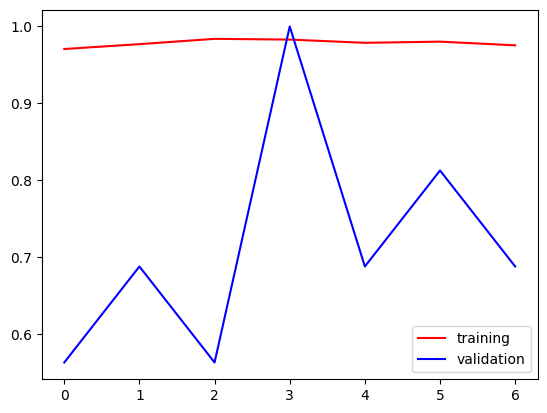

In [ ]:
plt.plot(history.history['accuracy'],color='red',label = 'training')
plt.plot(history.history['val_accuracy'],color='blue',label = 'validation')
plt.legend()
plt.show()

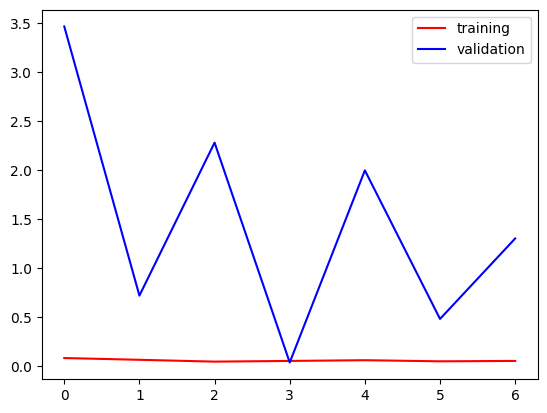

In [ ]:
plt.plot(history.history['loss'],color='red',label = 'training')
plt.plot(history.history['val_loss'],color='blue',label = 'validation')
plt.legend()
plt.show()

In [ ]:
best_epoch_val_loss = min(history.history['val_loss'])
best_epoch_index = history.history['val_loss'].index(best_epoch_val_loss)

best_epoch_val_accuracy = max(history.history['val_accuracy'])
best_epoch_accuracy_index = history.history['val_accuracy'].index(best_epoch_val_accuracy)

print(f"The best epoch for validation loss is: {best_epoch_index + 1} with val_loss: {best_epoch_val_loss}")
print(f"The best epoch for validation accuracy is: {best_epoch_accuracy_index + 1} with val_accuracy: {best_epoch_val_accuracy}")

The best epoch for validation loss is: 4 with val_loss: 0.0366085059940815
The best epoch for validation accuracy is: 4 with val_accuracy: 1.0


In [ ]:
model.evaluate(test_dataset)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.8203 - loss: 1.7881


[1.959652066230774, 0.8108974099159241]